# ResNet && CIFAR10/CIFAR100
We test ResNet classifier.
First init some basic environment.

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


One time installation of needed lib from requirement.txt and creating dir 

In [ ]:
!pip install -r requirements.txt
!mkdir data

# resnet20/56/110 model with CIFAR10 / CIFAR100


In [7]:
import torch.optim as optim
import torch.nn as nn
import time
from tnt_solver_ import *
from models.resnet10_ import resnet10_20, resnet10_56, resnet10_110
from models.resnet100_ import resnet100_20, resnet100_56, resnet100_110
from dataset.dataset_dowloader_ import *

cifar10_dowloader()
cifar100_dowloader()
# model = resnet20()
# print(model)

Successfully download file cv-course-public/coding-1/cifar-10-python.tar.gz from OBS to local ./data/cifar-10-python.tar.gz
Successfully download file cv-course-public/coding-1/cifar-100-python.tar.gz from OBS to local ./data/cifar-100-python.tar.gz


# Start learning 

## TODO
+ Stohastic gradient decrease? May be adam?
+ lr?
+ epoch?

In [ ]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

In [ ]:
plot_history(history)

# GREAT TODO
+ Test each modification 3 times for the average results
+ Solve some of todos above
+ Play with lr, epochs, STD
+ Graphics
+ Think about the best way to analyse all results
+ May be to play with VGG?
+ Why with classic startup options there is over learning after 90th epoch???

Control each model learning startup to re-define all weights. (maybe) 

# Pandas

In [ ]:
!pip3 install pandas

In [ ]:
import pandas as pd
import numpy as np

d = { "lrate" : [0.01, 0.001, 0.0001],
  "epochs": [10, 20, 30],
  "optimizer": ["Adam", "SGD", "Adadelta"]
}

# params = {
#     'lr': [0.01, 0.02],
#     'max_epochs': [10, 20],
# }
params = {
    'epoch': [10, 20],
}

In [ ]:
df = pd.DataFrame(d)
df

In [ ]:
def train_model(lrate, epochs, optimizer):
    print(lrate, epochs, optimizer)
    return 'GOVNO'

In [ ]:
models = []
for i, (lrate, epochs, optimizer) in df.iterrows():
    models.append(train_model(lrate, epochs, optimizer))
print(models)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
iris = datasets.load_iris()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)

clf = GridSearchCV(main, params)
clf.fit(iris.data, iris.target)


In [ ]:
clf.cv_results_

=========train sections 10-20 10-56 10-110 100-20 100-56 100-110========

In [8]:
model = resnet10_20()
print(model)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

In [9]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, 10, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.22it/s, loss:1.7606, acc:33.4850%]
Val loss: 1.8061, accuracy: 36.48%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.18it/s, loss:1.3585, acc:50.5150%]
Val loss: 1.3641, accuracy: 51.60%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.78it/s, loss:1.1033, acc:60.1775%]
Val loss: 1.1146, accuracy: 61.84%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.30it/s, loss:0.9448, acc:66.5100%]
Val loss: 1.0203, accuracy: 65.57%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.48it/s, loss:0.8243, acc:70.9225%]
Val loss: 0.8434, accuracy: 70.77%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.47it/s, loss:0.7363, acc:74.2575%]
Val loss: 0.7024, accuracy: 75.22%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Val loss: 0.5546, accuracy: 81.78%
Epoch: 25/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.47it/s, loss:0.3974, acc:86.0725%]
Val loss: 0.5577, accuracy: 81.57%
Epoch: 26/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.75it/s, loss:0.3847, acc:86.6900%]
Val loss: 0.5636, accuracy: 82.29%
Epoch: 27/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.23it/s, loss:0.3852, acc:86.5975%]
Val loss: 0.4913, accuracy: 84.02%
Epoch: 28/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.16it/s, loss:0.3731, acc:86.9875%]
Val loss: 0.5127, accuracy: 83.20%
Epoch: 29/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.03it/s, loss:0.3741, acc:87.0075%]
Val loss: 0.5253, accuracy: 83.27%
Epoch: 30/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.37it/s, loss:0.3701, acc:87.2075%]
Val loss: 0.4883, accuracy: 84.49%
Epoch: 31/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.27it/s, loss:0.3722, acc:87.0950%]
Val loss: 0.5054, accuracy:

100%|██████████| 625/625 [00:12<00:00, 49.68it/s, loss:0.0274, acc:99.1650%]
Val loss: 0.3398, accuracy: 91.94%
Epoch: 143/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.06it/s, loss:0.0274, acc:99.2325%]
Val loss: 0.3320, accuracy: 92.01%
Epoch: 144/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.81it/s, loss:0.0256, acc:99.2650%]
Val loss: 0.3405, accuracy: 91.96%
Epoch: 145/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 48.38it/s, loss:0.0251, acc:99.2325%]
Val loss: 0.3372, accuracy: 92.07%
Epoch: 146/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 48.88it/s, loss:0.0242, acc:99.3325%]
Val loss: 0.3379, accuracy: 92.10%
Epoch: 147/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 48.90it/s, loss:0.0249, acc:99.3150%]
Val loss: 0.3375, accuracy: 92.13%
Epoch: 148/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.15it/s, loss:0.0246, acc:99.2000%]
Val loss: 0.3422, accuracy: 92.11%
Epoch: 149/180, lr:1.00e-03
100%|██████████| 625

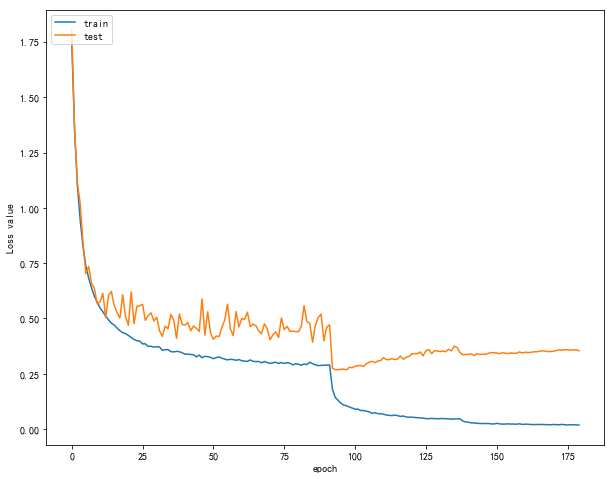

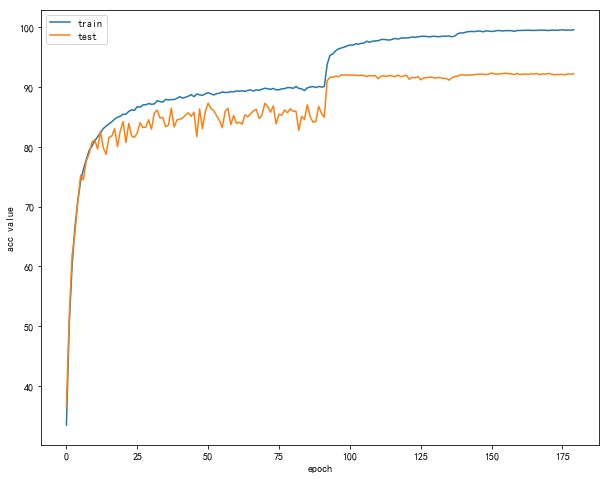

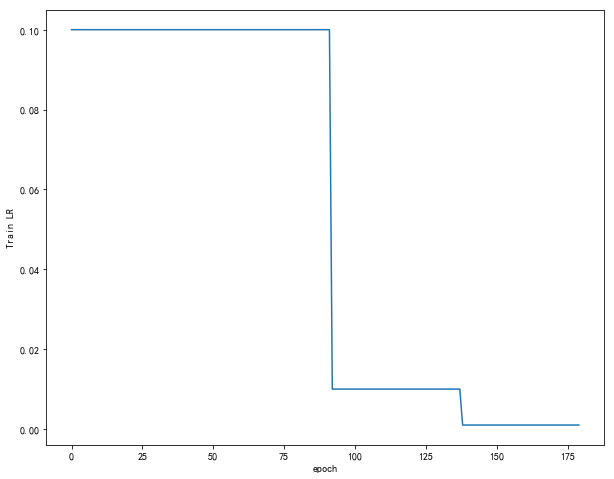

In [10]:
plot_history(history)

In [11]:
model = resnet10_56()
print(model)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

In [12]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, 10, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.24it/s, loss:1.8069, acc:31.8475%]
Val loss: 2.2784, accuracy: 27.23%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.62it/s, loss:1.3835, acc:49.1625%]
Val loss: 1.2497, accuracy: 54.33%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.64it/s, loss:1.0957, acc:60.8125%]
Val loss: 1.0350, accuracy: 64.39%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.69it/s, loss:0.9391, acc:66.8775%]
Val loss: 0.9571, accuracy: 67.40%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.39it/s, loss:0.8149, acc:71.6075%]
Val loss: 0.9337, accuracy: 68.47%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.50it/s, loss:0.7206, acc:74.7275%]
Val loss: 0.8770, accuracy: 71.77%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<

100%|██████████| 625/625 [00:28<00:00, 21.60it/s, loss:0.2607, acc:90.9325%]
Val loss: 0.4239, accuracy: 86.31%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.67it/s, loss:0.2573, acc:90.9350%]
Val loss: 0.4718, accuracy: 85.20%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.19it/s, loss:0.2543, acc:91.2325%]
Val loss: 0.4524, accuracy: 86.35%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.42it/s, loss:0.2566, acc:91.1925%]
Val loss: 0.4061, accuracy: 87.38%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.08it/s, loss:0.2575, acc:91.0225%]
Val loss: 0.4800, accuracy: 85.84%
Epoch: 67/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.62it/s, loss:0.2571, acc:91.1275%]
Val loss: 0.4517, accuracy: 85.74%
Epoch: 68/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.33it/s, loss:0.2529, acc:91.2325%]
Val loss: 0.3913, accuracy: 87.41%
Epoch: 69/180, lr:1.00e-01
100%|██████████| 625/625 [0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████| 625/625 [00:29<00:00, 21.46it/s, loss:0.0381, acc:98.7575%]
Val loss: 0.2716, accuracy: 92.88%
Epoch: 103/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.41it/s, loss:0.0351, acc:98.9575%]
Val loss: 0.2728, accuracy: 93.13%
Epoch: 104/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.34it/s, loss:0.0324, acc:98.9525%]
Val loss: 0.2713, accuracy: 93.04%
Epoch: 105/180, lr:1.00e-02
 68%|██████▊   | 426/625 [00:19<00:09, 21.78it/s, loss:0.0314, acc:98.9535%]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████| 625/625 [00:28<00:00, 21.95it/s, loss:0.0249, acc:99.2275%]
Val loss: 0.2962, accuracy: 93.16%
Epoch: 111/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.30it/s, loss:0.0248, acc:99.1575%]
Val loss: 0.2938, accuracy: 93.08%
Epoch: 112/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.50it/s, loss:0.0219, acc:99.2800%]
Val loss: 0.3040, accuracy: 93.19%
Epoch: 113/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.72it/s, loss:0.0216, acc:99.3075%]
Val loss: 0.3077, accuracy: 93.22%
Epoch: 114/180, lr:1.00e-02
 27%|██▋       | 168/625 [00:07<00:20, 22.69it/s, loss:0.0181, acc:99.3898%]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████| 625/625 [00:28<00:00, 21.70it/s, loss:0.0182, acc:99.4225%]
Val loss: 0.3163, accuracy: 93.08%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.63it/s, loss:0.0166, acc:99.5025%]
Val loss: 0.3188, accuracy: 93.03%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.43it/s, loss:0.0164, acc:99.4975%]
Val loss: 0.3170, accuracy: 93.09%
Epoch: 121/180, lr:1.00e-02
 91%|█████████ | 568/625 [00:25<00:02, 22.16it/s, loss:0.0174, acc:99.4178%]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████| 625/625 [00:28<00:00, 21.96it/s, loss:0.0166, acc:99.4975%]
Val loss: 0.3189, accuracy: 93.20%
Epoch: 126/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.52it/s, loss:0.0138, acc:99.5900%]
Val loss: 0.3333, accuracy: 92.90%
Epoch: 127/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.05it/s, loss:0.0150, acc:99.5575%]
Val loss: 0.3301, accuracy: 93.03%
Epoch: 128/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.54it/s, loss:0.0148, acc:99.5525%]
Val loss: 0.3200, accuracy: 93.27%
Epoch: 129/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 22.17it/s, loss:0.0144, acc:99.5225%]
Val loss: 0.3387, accuracy: 92.86%
Epoch: 130/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.20it/s, loss:0.0156, acc:99.5000%]
Val loss: 0.3212, accuracy: 93.31%
Epoch: 131/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 22.06it/s, loss:0.0130, acc:99.5775%]
Val loss: 0.3499, accuracy: 92.92%
Epoch: 132/180, lr:1.00e-02
100%|██████████| 625

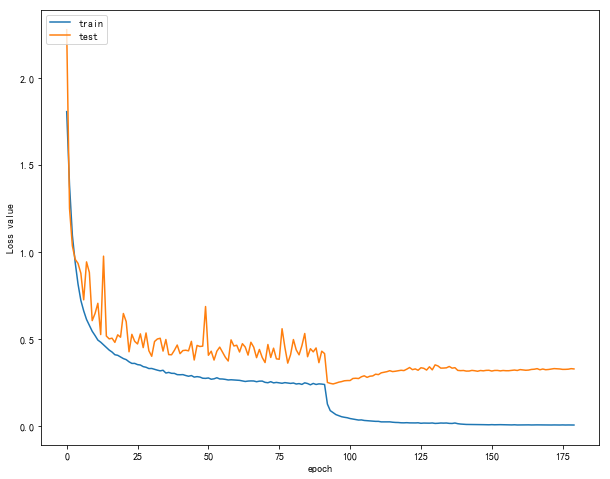

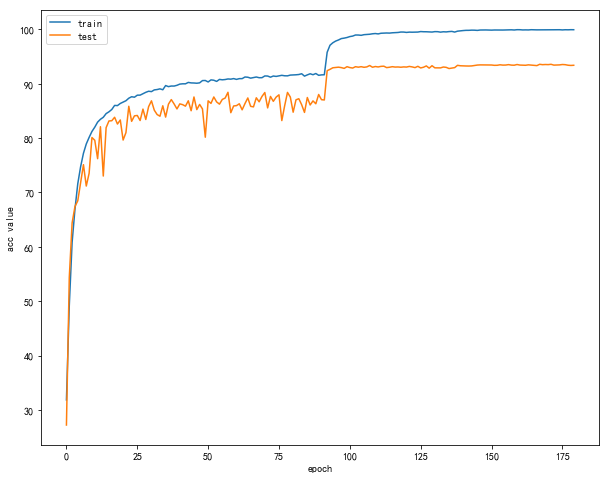

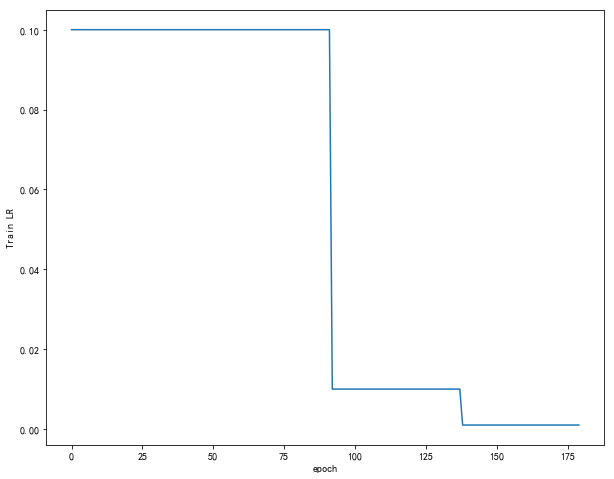

In [13]:
plot_history(history)

In [29]:
model = resnet10_110()
print(model)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

In [30]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, 10, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.77it/s, loss:1.9328, acc:26.6525%]
Val loss: 1.8186, accuracy: 33.95%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.66it/s, loss:1.6011, acc:40.5350%]
Val loss: 1.6182, accuracy: 41.16%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.77it/s, loss:1.3154, acc:52.3500%]
Val loss: 1.3229, accuracy: 54.56%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:52<00:00, 11.88it/s, loss:1.0852, acc:61.5075%]
Val loss: 0.9423, accuracy: 66.82%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.77it/s, loss:0.9140, acc:68.0675%]
Val loss: 0.8927, accuracy: 69.97%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.68it/s, loss:0.7995, acc:72.2550%]
Val loss: 0.7812, accuracy: 71.99%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<

100%|██████████| 625/625 [00:53<00:00, 11.75it/s, loss:0.2609, acc:90.9750%]
Val loss: 0.4874, accuracy: 85.43%
Epoch: 60/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.73it/s, loss:0.2620, acc:90.9325%]
Val loss: 0.4608, accuracy: 86.42%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.67it/s, loss:0.2590, acc:91.0375%]
Val loss: 0.3937, accuracy: 86.81%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.70it/s, loss:0.2553, acc:91.1325%]
Val loss: 0.4836, accuracy: 84.87%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.77it/s, loss:0.2575, acc:91.0700%]
Val loss: 0.4019, accuracy: 87.37%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.75it/s, loss:0.2532, acc:91.3675%]
Val loss: 0.5004, accuracy: 85.16%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.75it/s, loss:0.2463, acc:91.4600%]
Val loss: 0.4823, accuracy: 85.57%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:53<00:00, 11.68it/s, loss:0.0125, acc:99.6375%]
Val loss: 0.3070, accuracy: 93.38%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.67it/s, loss:0.0113, acc:99.6900%]
Val loss: 0.3120, accuracy: 93.41%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.77it/s, loss:0.0117, acc:99.6850%]
Val loss: 0.3262, accuracy: 93.21%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.74it/s, loss:0.0113, acc:99.6825%]
Val loss: 0.3241, accuracy: 93.46%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.64it/s, loss:0.0115, acc:99.6675%]
Val loss: 0.3146, accuracy: 93.36%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.77it/s, loss:0.0101, acc:99.7000%]
Val loss: 0.3172, accuracy: 93.36%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:52<00:00, 11.82it/s, loss:0.0106, acc:99.6900%]
Val loss: 0.3189, accuracy: 93.40%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

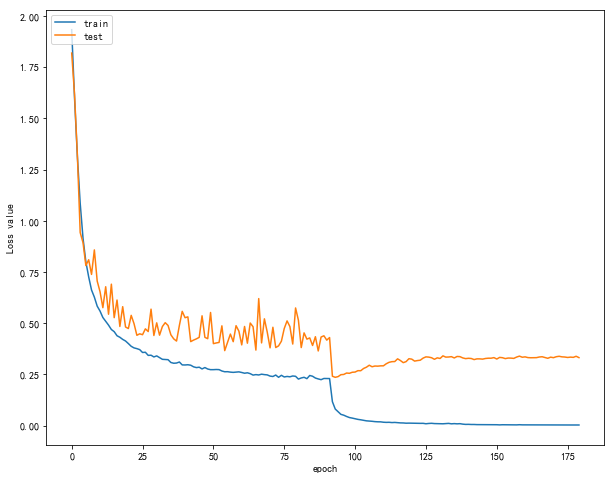

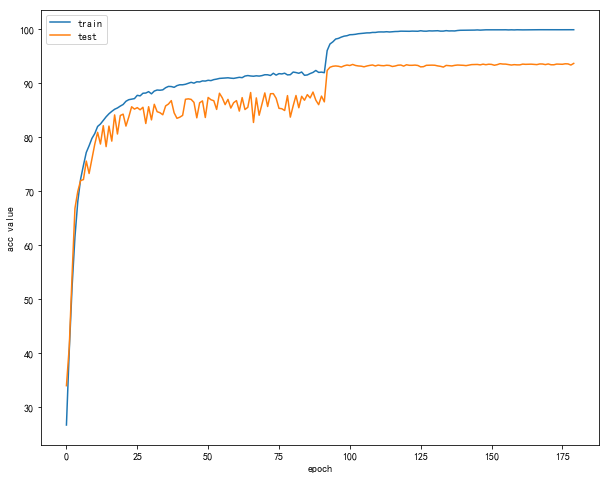

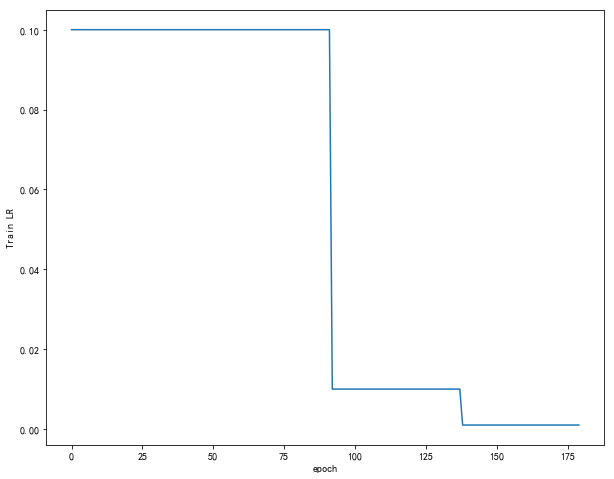

In [31]:
plot_history(history)

In [ ]:
model = resnet100_20()
print(model)

In [ ]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, 100, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Val loss: 1.4649, accuracy: 65.17%
Epoch: 133/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.46it/s, loss:0.5076, acc:84.1300%]
Val loss: 1.4907, accuracy: 64.98%
Epoch: 134/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.67it/s, loss:0.4946, acc:84.4325%]
Val loss: 1.4949, accuracy: 64.73%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.65it/s, loss:0.5024, acc:84.1800%]
Val loss: 1.5115, accuracy: 65.32%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.44it/s, loss:0.5005, acc:84.1425%]
Val loss: 1.5370, accuracy: 64.51%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.55it/s, loss:0.4892, acc:84.5300%]
Val loss: 1.5066, accuracy: 64.50%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.01it/s, loss:0.4978, acc:84.3825%]
Val loss: 1.5122, accuracy: 64.94%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 48.86it/s, loss:0.4317, acc:86.6900%]
Val loss: 1.4494, ac

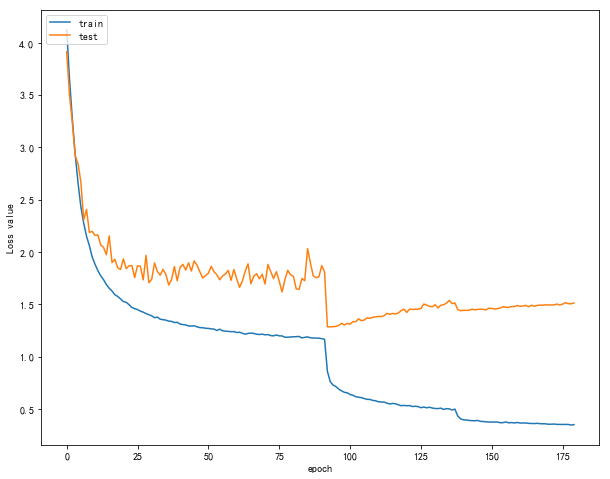

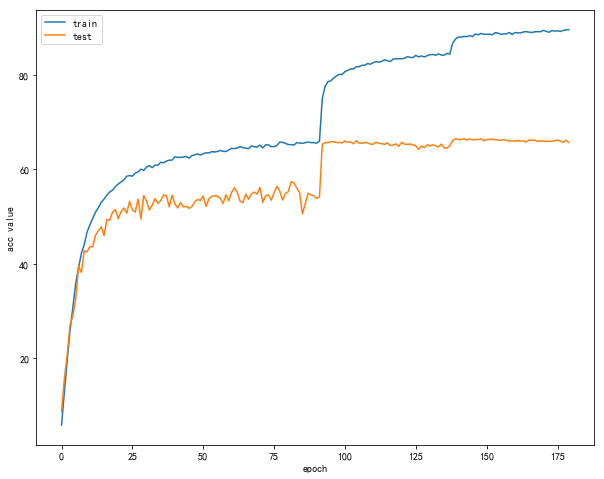

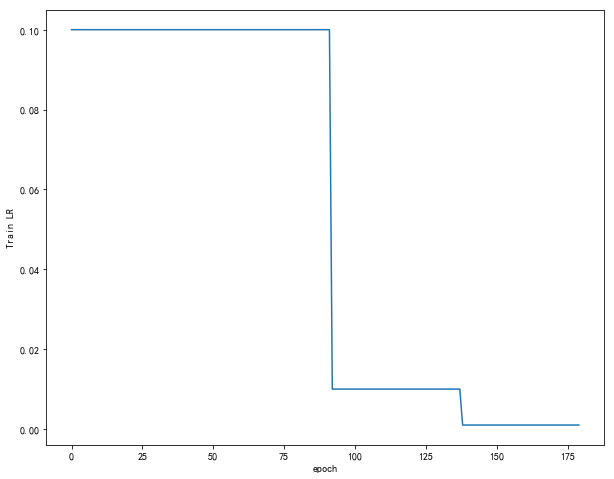

In [ ]:
plot_history(history)

In [ ]:
model = resnet100_56()
print(model)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

In [ ]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, 100, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.39it/s, loss:4.3109, acc:3.8550%]
Val loss: 3.9817, accuracy: 7.27%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.62it/s, loss:3.7953, acc:10.3475%]
Val loss: 3.6265, accuracy: 13.76%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:29<00:00, 21.40it/s, loss:3.4217, acc:17.0600%]
Val loss: 3.2214, accuracy: 20.76%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.65it/s, loss:3.0683, acc:23.1750%]
Val loss: 3.1507, accuracy: 23.64%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.62it/s, loss:2.7890, acc:28.8675%]
Val loss: 2.8116, accuracy: 29.16%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.61it/s, loss:2.5558, acc:33.1375%]
Val loss: 2.7722, accuracy: 31.07%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00

100%|██████████| 625/625 [00:28<00:00, 21.63it/s, loss:0.1740, acc:94.6300%]
Val loss: 1.5924, accuracy: 67.77%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.51it/s, loss:0.1671, acc:94.8350%]
Val loss: 1.5840, accuracy: 67.78%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.47it/s, loss:0.1653, acc:94.8475%]
Val loss: 1.5810, accuracy: 67.82%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.64it/s, loss:0.1614, acc:95.1150%]
Val loss: 1.6189, accuracy: 67.63%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.80it/s, loss:0.1582, acc:95.2375%]
Val loss: 1.6048, accuracy: 67.95%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.12it/s, loss:0.1593, acc:95.1825%]
Val loss: 1.6592, accuracy: 67.10%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:29<00:00, 21.47it/s, loss:0.1545, acc:95.2225%]
Val loss: 1.6296, accuracy: 67.36%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

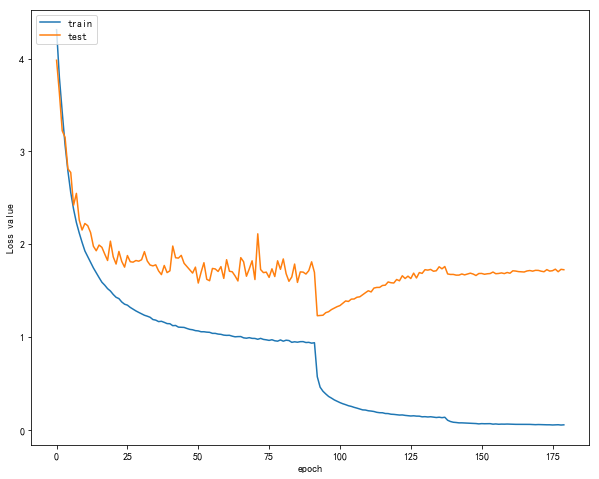

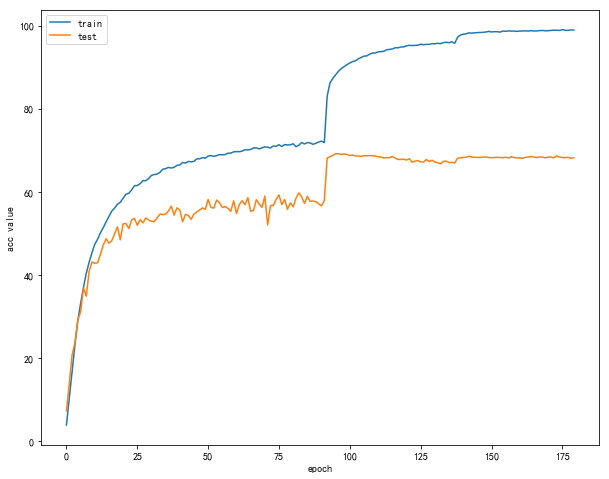

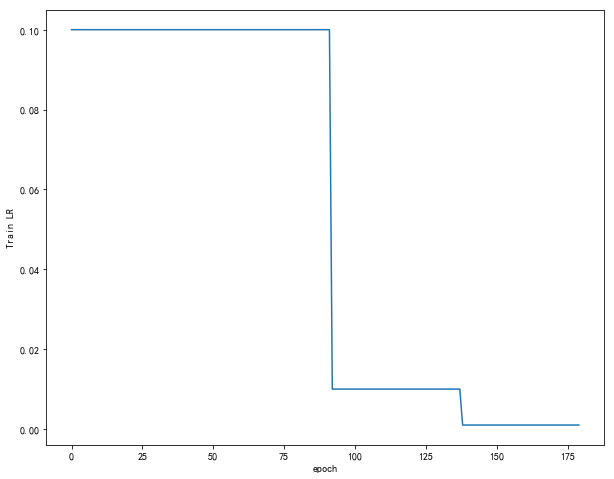

In [ ]:
plot_history(history)

In [ ]:
model = resnet100_110()
print(model)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

In [ ]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, 100, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.64it/s, loss:4.3088, acc:3.9625%]
Val loss: 4.0510, accuracy: 6.87%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.71it/s, loss:3.9051, acc:9.1175%]
Val loss: 3.7370, accuracy: 12.19%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.69it/s, loss:3.5694, acc:14.6575%]
Val loss: 3.4771, accuracy: 17.27%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.69it/s, loss:3.2489, acc:20.5775%]
Val loss: 3.2194, accuracy: 21.32%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.71it/s, loss:2.9562, acc:25.7575%]
Val loss: 2.8873, accuracy: 27.54%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:00, 11.62it/s, loss:2.6819, acc:31.0375%]
Val loss: 2.7913, accuracy: 30.58%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:53<00:

100%|██████████| 625/625 [00:53<00:00, 11.70it/s, loss:0.0694, acc:98.1025%]
Val loss: 1.6778, accuracy: 69.03%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:52<00:00, 11.85it/s, loss:0.0632, acc:98.2575%]
Val loss: 1.6796, accuracy: 69.64%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.78it/s, loss:0.0644, acc:98.2500%]
Val loss: 1.6611, accuracy: 69.40%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.73it/s, loss:0.0626, acc:98.3225%]
Val loss: 1.7030, accuracy: 69.35%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:52<00:00, 11.80it/s, loss:0.0632, acc:98.2925%]
Val loss: 1.7411, accuracy: 69.42%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.68it/s, loss:0.0590, acc:98.4575%]
Val loss: 1.7509, accuracy: 69.03%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:53<00:00, 11.60it/s, loss:0.0599, acc:98.3475%]
Val loss: 1.7273, accuracy: 69.10%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

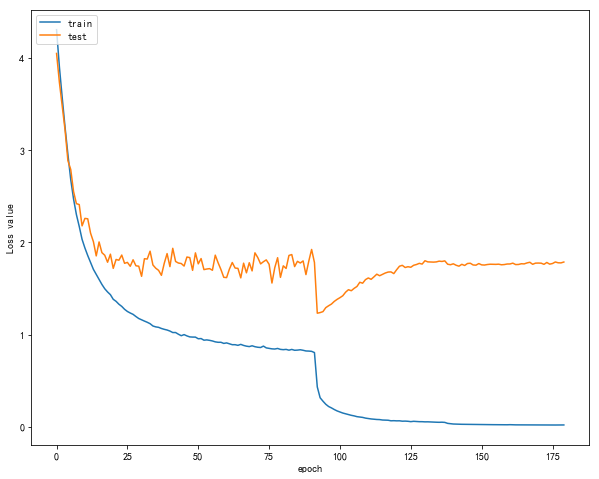

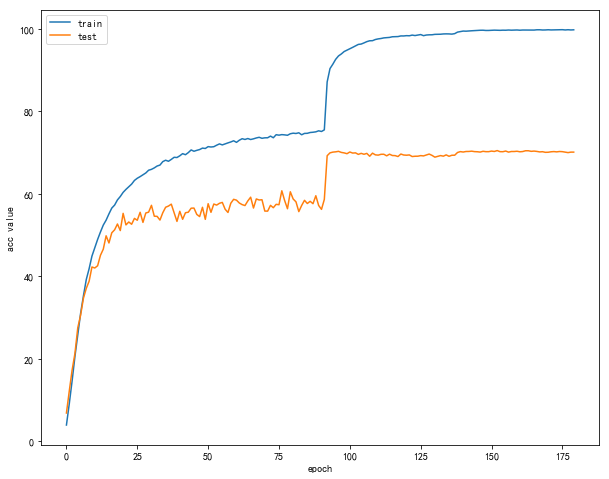

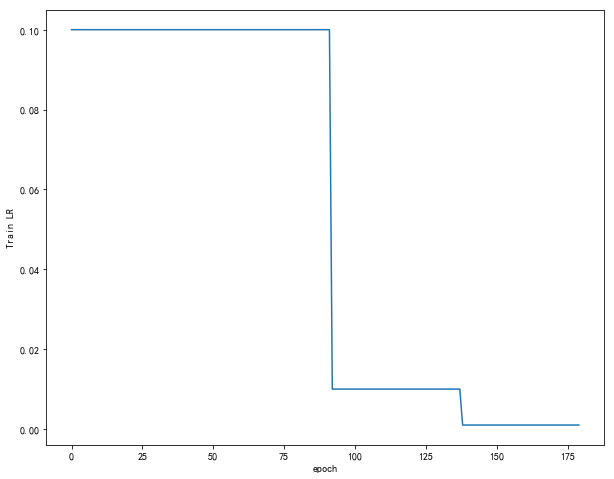

In [ ]:
plot_history(history)